# hw02

## 1. 计算1^2+2^2+......+10^2

In [1]:
s = 0
for i in range(10):
    s += (i+1)**2
s

385

## 2. 一个期限为两年的项目，初始投资为2000美元，预期在第1年年末产生800美元收益，第2年年末产生1600收益投资，计算该项目的内部收益率IRR

In [2]:
import numpy as np

In [3]:
np.irr([-2000, 800, 1600])

0.11651513899116828

## 3. 某人贷款20000元购买汽车，年利率为6%，他需要在5年内进行每月的分期付款，问他每个月需要支付多少钱 

In [4]:
np.pmt(0.06/12, 5*12, 20000)

-386.6560305885654

# hw03

## 对数据集d-aapl0305.txt绘制折线图与蜡烛图 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
%matplotlib inline

In [22]:
quotes = pd.read_csv('d-aapl0305.txt', sep='\s')

C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [23]:
quotes.head()

,Open,High,Low,Close,Volumn,AdjClose
0,14.80,14.93,14.59,14.90,5266200,7.42
1,15.03,15.38,14.88,14.90,13947600,7.42
2,14.79,15.00,14.47,14.85,12226600,7.39
3,14.58,14.71,14.44,14.55,8201600,7.24
4,14.62,14.92,14.50,14.68,7687600,7.31


## 折线图

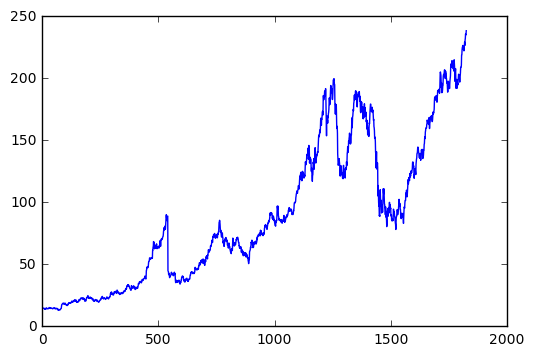

In [24]:
plt.plot(quotes['Close'])

## 蜡烛图

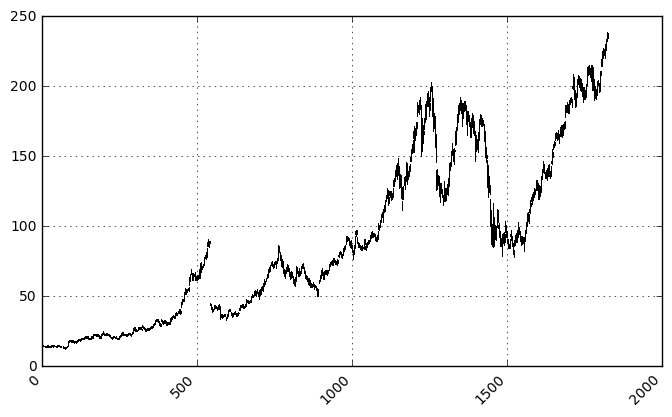

In [25]:
fig, ax = plt.subplots(figsize=(8, 5)) #设置图片大小
fig.subplots_adjust(bottom=0.2)
mpf.candlestick2_ochl(ax, opens=quotes["Open"].values, closes=quotes["Close"].values,
                 highs=quotes["High"].values, lows=quotes["Low"].values, width=0.6, colorup='b', colordown='r')
plt.grid(True)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




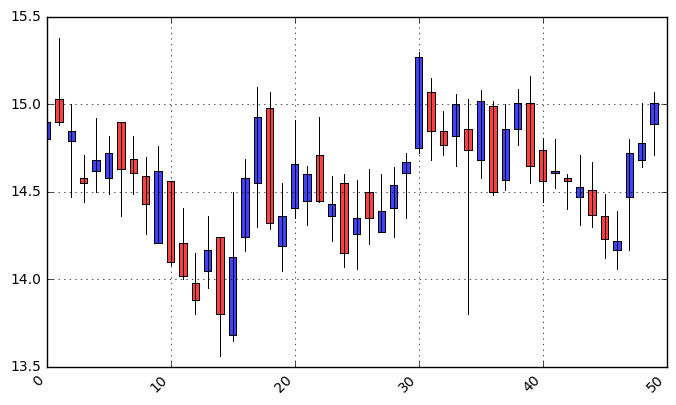

In [26]:
quotes = quotes.iloc[:50]
fig, ax = plt.subplots(figsize=(8, 5)) #设置图片大小
fig.subplots_adjust(bottom=0.2)
mpf.candlestick2_ochl(ax, opens=quotes["Open"].values, closes=quotes["Close"].values,
                 highs=quotes["High"].values, lows=quotes["Low"].values, width=0.6, colorup='b', colordown='r')
plt.grid(True)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




# hw04

 获取苹果公司从2014年1月1日到今天的股票数据

为了更加切合实际，选取的是sh510300ETF近3年的数据

## 1）画出股票数据的折线图

In [7]:
import requests
import json
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行
import matplotlib.pyplot as plt
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [1]:
def get_hist_k_data(code, datalen, verbose=False, plot=False):
    r = requests.get('http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol={}&scale=240&ma=no&datalen={}'.format(code, datalen))
    rs = r.text
    cols_num = ['open', 'high', 'low', 'close']
    cols = ['day', 'volume'] + cols_num
    for c in cols:
        rs = rs.replace(c, '"{}"'.format(c))
    df1 = pd.DataFrame(json.loads(rs))
    df1.loc[:, cols_num] = df1.loc[:, cols_num].applymap(float)
    df1.loc[:, 'day'] = pd.to_datetime(df1.day)
    df1.index = df1.day
    if verbose:
        print(df1.head(2))
        print(df1.tail(2))
    if plot:
        df1.close.plot()
        
    return df1

In [2]:
code = 'sh510300'
datalen = 250*3

            close        day   high    low   open    volume
day                                                        
2017-01-11  3.386 2017-01-11  3.422  3.385  3.405  94705340
2017-01-12  3.369 2017-01-12  3.395  3.366  3.386  84000935
            close        day   high    low   open     volume
day                                                         
2020-02-12  3.971 2020-02-12  3.977   3.93  3.939  290783451
2020-02-13   3.95 2020-02-13  3.985  3.938   3.97  325961046


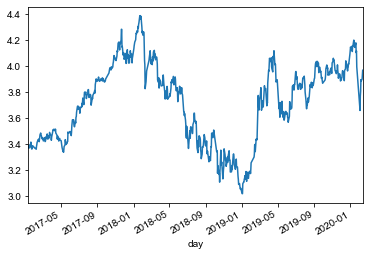

In [5]:
df = get_hist_k_data(code, datalen, True, True)

## 2）计算对数收益率



In [24]:
df['log_return'] = (df.close/df.close.shift(1)).map(np.log)

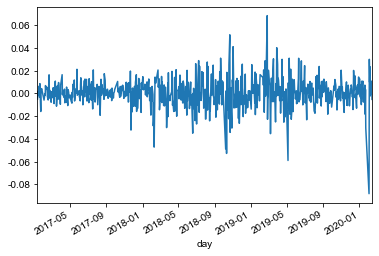

In [25]:
df.log_return.plot()

## 3）计算历史波动率

In [28]:
df['波动率'] = df.log_return.rolling(252).std()/np.sqrt(252)

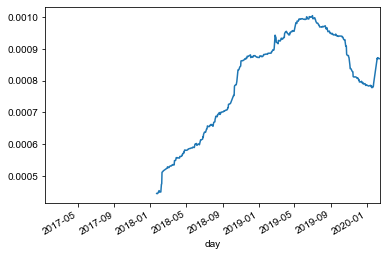

In [29]:
df.波动率.plot()

# lesson5

In [1]:
import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/plot_img_processing')
from plot_img_ops import plot2D

import numpy as np

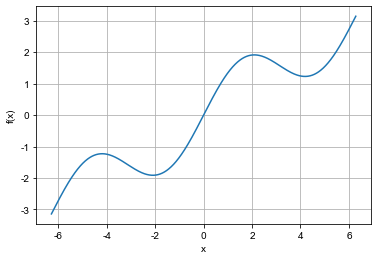

In [2]:
###逼近法###

def f(x):
    return np.sin(x) + 0.5 * x

plot2D(f, (-2 * np.pi, 2 * np.pi))